In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv ('models/WS_FV_2021_1_2_0_15_38_omit_one_color_first_train/performance.csv')
# print(df)
# WS_FV_2020_12_28_17_0_28_omit_one_shape_second_train
# WS_FV_2020_12_28_15_43_11_omit_one_color_second_train
# WS_FV_2020_12_28_19_33_20_top_bottom_second_train

# WS_FV_2020_12_28_15_43_11_omit_one_color_first_train
# WS_FV_2021_1_2_0_15_38_omit_one_color_first_train
# WS_FV_2021_1_3_16_12_19_omit_one_color_first_train_(test_omit_only)
# WS_FV_2020_12_28_19_33_20_top_bottom_first_train


In [ ]:
# a "CN" color spec, i.e. 'C' followed by a number, which is an index into the default property cycle (rcParams["axes.prop_cycle"] 

# (default: cycler('color', 
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
#'#e377c2', '#7f7f7f', '#bcbd22', '#17becf']))); 

# the indexing is intended to occur at rendering time, and defaults to black if the cycle does not include color.
print(df.columns)

In [ ]:
idx = []
for i in range(41):
    idx.append(i * 25)
# print(idx)

df.insert(0, 'epochs', idx, allow_duplicates=False)


In [ ]:
########### usual ############
datas = df[['epochs',"shape_training_accuracy", "size_training_accuracy", "color_training_accuracy", 
            "shape_test_accuracy", "size_test_accuracy","color_test_accuracy"]]

ax = plt.gca()
datas.plot(kind='line',x='epochs',y='shape_training_accuracy', color='#1f77b4', ax = ax)
datas.plot(kind='line',x='epochs',y='size_training_accuracy', color='#ff7f0e', ax = ax)
datas.plot(kind='line',x='epochs',y='color_training_accuracy', color='#2ca02c', ax = ax)

datas.plot(linestyle=':',x='epochs',y='shape_test_accuracy', color='#1f77b4', ax = ax)
datas.plot(linestyle=':',x='epochs',y='size_test_accuracy', color='#ff7f0e', ax = ax)
datas.plot(linestyle=':',x='epochs',y='color_test_accuracy', color='#2ca02c', ax = ax)

# plt.show()
# plt.savefig('figures/3_action2vs2_shape_line')

In [ ]:
############# omit shape ##################
non_tetro1_train = df.loc[: , ["monomino_training_accuracy", "domino_training_accuracy", "tromino1_training_accuracy", "tromino2_training_accuracy",
              "tetromino2_training_accuracy", "tetromino3_training_accuracy", "tetromino4_training_accuracy",
              "tetromino5_training_accuracy"]]
df['non_tetro1_train'] = non_tetro1_train.mean(axis=1)

non_tetro1_test = df.loc[: , ['monomino_test_accuracy', 'domino_test_accuracy',
       'tromino1_test_accuracy', 'tromino2_test_accuracy',
       'tetromino2_test_accuracy',
       'tetromino3_test_accuracy', 'tetromino4_test_accuracy',
       'tetromino5_test_accuracy']]
df['non_tetro1_test'] = non_tetro1_test.mean(axis=1)

ax = plt.gca()
df.plot(kind='line',x='epochs',y='non_tetro1_train', color='#1f77b4', ax = ax)
df.plot(kind='line',x='epochs',y='size_training_accuracy', color='#ff7f0e', ax = ax)
df.plot(kind='line',x='epochs',y='color_training_accuracy', color='#2ca02c', ax = ax)

df.plot(linestyle=':',x='epochs',y='non_tetro1_test', color='#1f77b4', ax = ax)
df.plot(linestyle=':',x='epochs',y='size_test_accuracy', color='#ff7f0e', ax = ax)
df.plot(linestyle=':',x='epochs',y='color_test_accuracy', color='#2ca02c', ax = ax)
df.plot(linestyle=':',x='epochs',y='tetromino1_test_accuracy', color='#d62728', ax = ax)

plt.show()
# plt.savefig('figures/2a_omit_one_shape_line')


In [ ]:
############# omit color ##################
non_black_train = df.loc[: , ['white_training_accuracy',
       'red_training_accuracy', 'blue_training_accuracy',
       'green_training_accuracy', 'yellow_training_accuracy',
       'cyan_training_accuracy', 'magenta_training_accuracy']]
df['non_black_train'] = non_black_train.mean(axis=1)

non_black_test = df.loc[: , ['white_test_accuracy', 'red_test_accuracy', 'blue_test_accuracy',
       'green_test_accuracy', 'yellow_test_accuracy', 'cyan_test_accuracy',
       'magenta_test_accuracy']]
df['non_black_test'] = non_black_test.mean(axis=1)

ax = plt.gca()
df.plot(kind='line',x='epochs',y='non_black_train', color='#2ca02c', ax = ax)
df.plot(kind='line',x='epochs',y='shape_training_accuracy', color='#1f77b4', ax = ax)
df.plot(kind='line',x='epochs',y='size_training_accuracy', color='#ff7f0e', ax = ax)

df.plot(linestyle=':',x='epochs',y='non_black_test', color='#2ca02c', ax = ax)
df.plot(linestyle=':',x='epochs',y='shape_test_accuracy', color='#1f77b4', ax = ax)
df.plot(linestyle=':',x='epochs',y='size_test_accuracy', color='#ff7f0e', ax = ax)
df.plot(linestyle=':',x='epochs',y='black_test_accuracy', color='#d62728', ax = ax)

plt.show()
# plt.savefig('figures/2b_omit_black_line')



In [ ]:
############# bottom vs. top ##############
datas = df[['epochs',"shape_training_accuracy", "size_training_accuracy", "color_training_accuracy", 
            "shape_test_accuracy", "size_test_accuracy","color_test_accuracy"]]

datas = datas.rename(columns={'shape_training_accuracy': 'shape_top_accuracy'})
datas = datas.rename(columns={'size_training_accuracy': 'size_top_accuracy'})
datas = datas.rename(columns={'color_training_accuracy': 'color_top_accuracy'})
datas = datas.rename(columns={'shape_test_accuracy': 'shape_bottom_accuracy'})
datas = datas.rename(columns={'size_test_accuracy': 'size_bottom_accuracy'})
datas = datas.rename(columns={'color_test_accuracy': 'color_bottom_accuracy'})

ax = plt.gca()
datas.plot(kind='line',x='epochs',y='shape_top_accuracy', color='#1f77b4', ax = ax)
datas.plot(kind='line',x='epochs',y='size_top_accuracy', color='#ff7f0e', ax = ax)
datas.plot(kind='line',x='epochs',y='color_top_accuracy', color='#2ca02c', ax = ax)

datas.plot(linestyle=':',x='epochs',y='shape_bottom_accuracy', color='#1f77b4', ax = ax)
datas.plot(linestyle=':',x='epochs',y='size_bottom_accuracy', color='#ff7f0e', ax = ax)
datas.plot(linestyle=':',x='epochs',y='color_bottom_accuracy', color='#2ca02c', ax = ax)

plt.show()
# plt.savefig('figures/2c_top_bottom_first_stage_line')


In [77]:
############################ two stages training ###############################
df = pd.read_csv ('models/WS_FV_2021_1_8_0_32_57_omit_red_color_second_train_omit_only/performance.csv')
# df = pd.read_csv ('models/WS_FV_2021_1_7_15_38_49_omit_tro2_shape_second_train_omit_only/Polyomino World - tro1 data - Sheet1.csv')

# print(datas1)
# print("============================================\n")
# print(datas2)

# WS_FV_2021_1_8_0_32_57_omit_red_color_second_train_omit_only
# WS_FV_2020_12_28_15_43_11_omit_black_color_first_train
# WS_FV_2020_12_28_15_43_11_omit_black_color_second_train
# WS_FV_2020_12_28_15_43_11_omit_black_color_second_train_complete
# WS_FV_2020_12_28_15_43_11_omit_black_color_second_train_complete_epo1
# WS_FV_2020_12_28_15_43_11_omit_black_color_second_train_epo1
# WS_FV_2020_12_28_17_0_28_omit_tetro1_shape_first_train
# WS_FV_2020_12_28_17_0_28_omit_tetro1_shape_second_train
# WS_FV_2020_12_28_17_0_28_omit_tetro1_shape_second_train_(first_omit_second_complete)
# WS_FV_2020_12_28_17_0_28_omit_tetro1_shape_second_train_complete_epo10
# WS_FV_2020_12_28_17_0_28_omit_tetro1_shape_second_train_epo_1
# WS_FV_2020_12_28_19_33_20_top_bottom_first_train
# WS_FV_2020_12_28_19_33_20_top_bottom_second_train
# WS_FV_2020_12_28_19_33_20_top_bottom_second_train_complete
# WS_FV_2021_1_1_15_39_23_omit_tetro1_shape_first_stage_train_&_test_complete_epo5
# WS_FV_2021_1_1_15_39_23_omit_tetro1_shape_second_stage_train_&_test_complete_epo5
# WS_FV_2021_1_1_17_42_20_omit_tetro1_color_first_stage_train_&_test_complete_epo5
# WS_FV_2021_1_1_17_42_20_omit_tetro1_color_second_stage_train_&_test_complete_epo5
# WS_FV_2021_1_1_19_44_53_top_bottom_first_stage_train_&_test_complete_epo5
# WS_FV_2021_1_1_19_44_53_top_bottom_second_stage_train_&_test_complete_epo5
# WS_FV_2021_1_2_0_15_38_omit_black_color_first_train
# WS_FV_2021_1_2_0_15_38_omit_black_color_second_train_complete
# WS_FV_2021_1_2_0_15_38_omit_black_color_second_train_test_one_color
# WS_FV_2021_1_3_16_12_19_omit_black_color_first_train_(test_omit_only)
# WS_FV_2021_1_3_16_12_19_omit_black_color_second_train_(first_omit_second_complete)
# WS_FV_2021_1_3_16_12_19_omit_black_color_second_train_(test_omit_only)
# WS_FV_2021_1_6_18_6_8_half_variant_first_train(one_action)
# WS_FV_2021_1_6_18_6_8_half_variant_second_train(one_action)_complete
# WS_FV_2021_1_6_18_6_8_half_variant_second_train(one_action)_omit_only
# WS_FV_2021_1_6_23_29_45_omit_mono_shape_first_train
# WS_FV_2021_1_6_23_29_45_omit_mono_shape_second_train_complete
# WS_FV_2021_1_6_23_29_45_omit_mono_shape_second_train_omit_only
# WS_FV_2021_1_7_15_29_44_omit_domino_shape_first_train
# WS_FV_2021_1_7_15_29_44_omit_domino_shape_second_train_complete
# WS_FV_2021_1_7_15_29_44_omit_domino_shape_second_train_omit_only
# WS_FV_2021_1_7_15_35_23_omit_tro1_shape_first_train
# WS_FV_2021_1_7_15_35_23_omit_tro1_shape_second_train_complete
# WS_FV_2021_1_7_15_35_23_omit_tro1_shape_second_train_omit_only
# WS_FV_2021_1_7_15_38_49_omit_tro2_shape_first_train
# WS_FV_2021_1_7_15_38_49_omit_tro2_shape_second_train_complete
# WS_FV_2021_1_7_15_38_49_omit_tro2_shape_second_train_omit_only
# WS_FV_2021_1_7_15_40_43_omit_tetro2_shape_first_train
# WS_FV_2021_1_7_15_40_43_omit_tetro2_shape_second_train_complete
# WS_FV_2021_1_7_15_40_43_omit_tetro2_shape_second_train_omit_only
# WS_FV_2021_1_7_15_41_51_omit_tetro3_shape_first_train
# WS_FV_2021_1_7_15_41_51_omit_tetro3_shape_second_train_complete
# WS_FV_2021_1_7_15_41_51_omit_tetro3_shape_second_train_omit_only
# WS_FV_2021_1_7_17_38_1_omit_tetro4_shape_first_train
# WS_FV_2021_1_7_17_38_1_omit_tetro4_shape_second_train_complete
# WS_FV_2021_1_7_17_38_1_omit_tetro4_shape_second_train_omit_only
# WS_FV_2021_1_7_17_39_7_omit_tetro5_shape_first_train
# WS_FV_2021_1_7_17_39_7_omit_tetro5_shape_second_train_complete
# WS_FV_2021_1_7_17_39_7_omit_tetro5_shape_second_train_omit_only
# WS_FV_2021_1_7_17_41_33_omit_white_color_first_train
# WS_FV_2021_1_7_17_41_33_omit_white_color_second_train_complete
# WS_FV_2021_1_7_17_41_33_omit_white_color_second_train_omit_only
# WS_FV_2021_1_7_17_45_15_omit_blue_color_first_train
# WS_FV_2021_1_7_17_45_15_omit_blue_color_second_train_complete
# WS_FV_2021_1_7_17_45_15_omit_blue_color_second_train_omit_only
# WS_FV_2021_1_7_21_48_27_omit_magenta_color_first_train
# WS_FV_2021_1_7_21_48_27_omit_magenta_color_second_train_complete
# WS_FV_2021_1_7_21_48_27_omit_magenta_color_second_train_omit_only
# WS_FV_2021_1_7_21_48_55_omit_cyan_color_first_train
# WS_FV_2021_1_7_21_48_55_omit_cyan_color_second_train_complete
# WS_FV_2021_1_7_21_48_55_omit_cyan_color_second_train_omit_only
# WS_FV_2021_1_7_21_49_34_omit_yellow_color_first_train
# WS_FV_2021_1_7_21_49_34_omit_yellow_color_second_train_complete
# WS_FV_2021_1_7_21_49_34_omit_yellow_color_second_train_omit_only
# WS_FV_2021_1_7_21_50_34_omit_green_color_first_train
# WS_FV_2021_1_7_21_50_34_omit_green_color_second_train_complete
# WS_FV_2021_1_7_21_50_34_omit_green_color_second_train_omit_only
# WS_FV_2021_1_8_0_32_57_omit_red_color_first_train
# WS_FV_2021_1_8_0_32_57_omit_red_color_second_train_complete
# WS_FV_2021_1_8_0_32_57_omit_red_color_second_train_omit_only




In [78]:
# a "CN" color spec, i.e. 'C' followed by a number, which is an index into the default property cycle (rcParams["axes.prop_cycle"] 

# (default: cycler('color', 
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 
#'#e377c2', '#7f7f7f', '#bcbd22', '#17becf']))); 

# the indexing is intended to occur at rendering time, and defaults to black if the cycle does not include color.
print(df.columns)


Index(['epoch', 'time', 'training_cost', 'test_cost', 'shape_training_cost',
       'size_training_cost', 'color_training_cost', 'shape_test_cost',
       'size_test_cost', 'color_test_cost', 'shape_training_accuracy',
       'size_training_accuracy', 'color_training_accuracy',
       'shape_test_accuracy', 'size_test_accuracy', 'color_test_accuracy',
       'monomino_training_accuracy', 'domino_training_accuracy',
       'tromino1_training_accuracy', 'tromino2_training_accuracy',
       'tetromino1_training_accuracy', 'tetromino2_training_accuracy',
       'tetromino3_training_accuracy', 'tetromino4_training_accuracy',
       'tetromino5_training_accuracy', '1_training_accuracy',
       '2_training_accuracy', '3_training_accuracy', '4_training_accuracy',
       'black_training_accuracy', 'white_training_accuracy',
       'red_training_accuracy', 'blue_training_accuracy',
       'green_training_accuracy', 'yellow_training_accuracy',
       'cyan_training_accuracy', 'magenta_training_ac

In [79]:
######### 25 epos ##########
datas1 = df.iloc[0:40, :]
datas2 = df.iloc[41:81, :]

idx = []
for i in range(40):
    idx.append(i * 25)
# print(idx)

datas1.insert(0, 'epochs', idx, allow_duplicates=False)
# datas1['epochs'] = idx
datas2.insert(0, 'epochs', idx, allow_duplicates=False)
# datas2['epochs'] = idx


In [ ]:
######### 5 epos ###########
datas1 = df.iloc[0:200, :]
datas2 = df.iloc[201:401, :]

idx = []
for i in range(200):
    idx.append(i * 5)
# print(idx)

datas1.insert(0, 'epochs', idx, allow_duplicates=False)
# datas1['epochs'] = idx
datas2.insert(0, 'epochs', idx, allow_duplicates=False)
# datas2['epochs'] = idx


In [ ]:
############# normal ################
datas1 = datas1.rename(columns={'shape_training_accuracy': 'shape_first_train_accuracy'})
datas1 = datas1.rename(columns={'size_training_accuracy': 'size_first_train_accuracy'})
datas1 = datas1.rename(columns={'color_training_accuracy': 'color_first_train_accuracy'})
datas1 = datas1.rename(columns={'shape_test_accuracy': 'shape_first_test_accuracy'})
datas1 = datas1.rename(columns={'size_test_accuracy': 'size_first_test_accuracy'})
datas1 = datas1.rename(columns={'color_test_accuracy': 'color_first_test_accuracy'})

datas2 = datas2.rename(columns={'shape_training_accuracy': 'shape_second_train_accuracy'})
datas2 = datas2.rename(columns={'size_training_accuracy': 'size_second_train_accuracy'})
datas2 = datas2.rename(columns={'color_training_accuracy': 'color_second_train_accuracy'})
datas2 = datas2.rename(columns={'shape_test_accuracy': 'shape_second_test_accuracy'})
datas2 = datas2.rename(columns={'size_test_accuracy': 'size_second_test_accuracy'})
datas2 = datas2.rename(columns={'color_test_accuracy': 'color_second_test_accuracy'})

ax = plt.gca()

datas1.plot(kind='line',x='epochs',y='shape_first_train_accuracy', color='#1f77b4', ax = ax)
# datas1.plot(kind='line',x='epochs',y='size_first_train_accuracy', color='#ff7f0e', ax = ax)
# datas1.plot(kind='line',x='epochs',y='color_first_train_accuracy', color='#2ca02c', ax = ax)

datas1.plot(linestyle=':',x='epochs',y='shape_first_test_accuracy', color='#1f77b4', ax = ax)
# datas1.plot(linestyle=':',x='epochs',y='size_first_test_accuracy', color='#ff7f0e', ax = ax)
# datas1.plot(linestyle=':',x='epochs',y='color_first_test_accuracy', color='#2ca02c', ax = ax)

datas2.plot(kind='line',x='epochs',y='shape_second_train_accuracy', color='#d62728', ax = ax)
# datas2.plot(kind='line',x='epochs',y='size_second_train_accuracy', color='#7f7f7f', ax = ax)
# datas2.plot(kind='line',x='epochs',y='color_second_train_accuracy', color='#bcbd22', ax = ax)

datas2.plot(linestyle=':',x='epochs',y='shape_second_test_accuracy', color='#d62728', ax = ax)
# datas2.plot(linestyle=':',x='epochs',y='size_second_test_accuracy', color='#7f7f7f', ax = ax)
# datas2.plot(linestyle=':',x='epochs',y='color_second_test_accuracy', color='#bcbd22', ax = ax)

plt.show()
# plt.savefig('figures/3_omit_half_variant_second_stage_complete_full_line')
# plt.savefig('figures/3_omit_half_variant_second_stage_complete_shape_only_line')


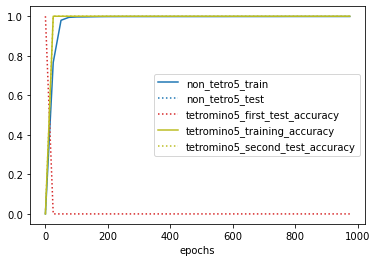

In [42]:
############# omit shape ##################
non_tetro5_train = datas1.loc[: , ["tetromino1_training_accuracy", "monomino_training_accuracy", "domino_training_accuracy", "tromino1_training_accuracy",
              "tromino2_training_accuracy", "tetromino2_training_accuracy", "tetromino3_training_accuracy",
              "tetromino4_training_accuracy"]]
datas1['non_tetro5_train'] = non_tetro5_train.mean(axis=1)
# datas1.insert(1, 'non_domino_train', non_domino_train.mean(axis=1), allow_duplicates=False)

non_tetro5_test = datas1.loc[: , ['tetromino1_test_accuracy', 'monomino_test_accuracy',
       'domino_test_accuracy', 'tromino1_test_accuracy',
       'tromino2_test_accuracy',
       'tetromino2_test_accuracy', 'tetromino3_test_accuracy',
       'tetromino4_test_accuracy']]
datas1['non_tetro5_test'] = non_tetro5_test.mean(axis=1)
# datas1.insert(2, 'non_domino_test', non_domino_test.mean(axis=1), allow_duplicates=False)

datas1 = datas1.rename(columns={'tetromino5_test_accuracy': 'tetromino5_first_test_accuracy'})
datas2 = datas2.rename(columns={'tetromino5_test_accuracy': 'tetromino5_second_test_accuracy'})

ax = plt.gca()
datas1.plot(kind='line',x='epochs',y='non_tetro5_train', color='#1f77b4', ax = ax)
# datas1.plot(kind='line',x='epochs',y='size_training_accuracy', color='#ff7f0e', ax = ax)
# datas1.plot(kind='line',x='epochs',y='color_training_accuracy', color='#2ca02c', ax = ax)

datas1.plot(linestyle=':',x='epochs',y='non_tetro5_test', color='#1f77b4', ax = ax)
# datas1.plot(linestyle=':',x='epochs',y='size_test_accuracy', color='#ff7f0e', ax = ax)
# datas1.plot(linestyle=':',x='epochs',y='color_test_accuracy', color='#2ca02c', ax = ax)
datas1.plot(linestyle=':',x='epochs',y='tetromino5_first_test_accuracy', color='#d62728', ax = ax)

datas2.plot(kind='line',x='epochs',y='tetromino5_training_accuracy', color='#bcbd22', ax = ax)
datas2.plot(linestyle=':',x='epochs',y='tetromino5_second_test_accuracy', color='#bcbd22', ax = ax)

plt.show()
# plt.savefig('figures/4_2a_omit_tetro5_shape_second_stage_omit_test_full_line')
# plt.savefig('figures/4_2a_omit_tetro5_shape_second_stage_omit_test_only_shape_line')
# plt.savefig('figures/4_2a_omit_domino_shape_second_stage_train_test_complete_full_line')
# plt.savefig('figures/4_2a_omit_domino_shape_second_stage_train_test_complete_shape_only_line')



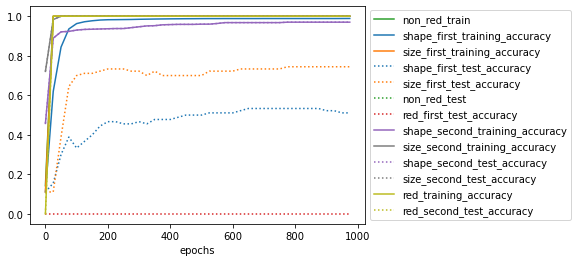

In [82]:
############# omit color ##################
non_red_train = datas1.loc[: , ['black_training_accuracy',
       'green_training_accuracy', 'white_training_accuracy',
       'yellow_training_accuracy', 'cyan_training_accuracy',
       'magenta_training_accuracy', 'blue_training_accuracy']]
datas1['non_red_train'] = non_red_train.mean(axis=1)

non_red_test = datas1.loc[: , ['black_test_accuracy', 'green_test_accuracy', 'white_test_accuracy',
       'yellow_test_accuracy', 'cyan_test_accuracy', 'magenta_test_accuracy',
       'blue_test_accuracy']]
datas1['non_red_test'] = non_red_test.mean(axis=1)

datas1 = datas1.rename(columns={'red_test_accuracy': 'red_first_test_accuracy'})
datas1 = datas1.rename(columns={'shape_training_accuracy': 'shape_first_training_accuracy'})
datas1 = datas1.rename(columns={'shape_test_accuracy': 'shape_first_test_accuracy'})
datas1 = datas1.rename(columns={'size_training_accuracy': 'size_first_training_accuracy'})
datas1 = datas1.rename(columns={'size_test_accuracy': 'size_first_test_accuracy'})

datas2 = datas2.rename(columns={'red_test_accuracy': 'red_second_test_accuracy'})
datas2 = datas2.rename(columns={'shape_training_accuracy': 'shape_second_training_accuracy'})
datas2 = datas2.rename(columns={'shape_test_accuracy': 'shape_second_test_accuracy'})
datas2 = datas2.rename(columns={'size_training_accuracy': 'size_second_training_accuracy'})
datas2 = datas2.rename(columns={'size_test_accuracy': 'size_second_test_accuracy'})

ax = plt.gca()
datas1.plot(kind='line',x='epochs',y='non_red_train', color='#2ca02c', ax = ax)
datas1.plot(kind='line',x='epochs',y='shape_first_training_accuracy', color='#1f77b4', ax = ax)
datas1.plot(kind='line',x='epochs',y='size_first_training_accuracy', color='#ff7f0e', ax = ax)

datas1.plot(linestyle=':',x='epochs',y='shape_first_test_accuracy', color='#1f77b4', ax = ax)
datas1.plot(linestyle=':',x='epochs',y='size_first_test_accuracy', color='#ff7f0e', ax = ax)

datas1.plot(linestyle=':',x='epochs',y='non_red_test', color='#2ca02c', ax = ax)
datas1.plot(linestyle=':',x='epochs',y='red_first_test_accuracy', color='#d62728', ax = ax)

datas2.plot(kind='line',x='epochs',y='shape_second_training_accuracy', color='#9467bd', ax = ax)
datas2.plot(kind='line',x='epochs',y='size_second_training_accuracy', color='#7f7f7f', ax = ax)
datas2.plot(linestyle=':',x='epochs',y='shape_second_test_accuracy', color='#9467bd', ax = ax)
datas2.plot(linestyle=':',x='epochs',y='size_second_test_accuracy', color='#7f7f7f', ax = ax)

datas2.plot(kind='line',x='epochs',y='red_training_accuracy', color='#bcbd22', ax = ax)
datas2.plot(linestyle=':',x='epochs',y='red_second_test_accuracy', color='#bcbd22', ax = ax)

plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
# plt.savefig('figures/4_2b_omit_red_second_stage_test_omit_full_line')
# plt.savefig('figures/4_2b_omit_red_second_stage_test_omit_only_color_line')
# plt.savefig('figures/4_2b_omit_black_second_stage_train_&_test_complete_epo5_full_line')
# plt.savefig('figures/4_2b_omit_black_second_stage_train_&_test_complete_epo5_only_color_line')

# plt.savefig('figures/4_2b_omit_black_second_stage_omit_only_new_full_line')
# plt.savefig('figures/4_2b_omit_black_second_stage_omit_only_new_only_color_line')
# plt.savefig('figures/4_2b_omit_black_second_stage_test_complete_new_full_line')
# plt.savefig('figures/4_2b_omit_black_second_stage_test_complete_new_only_color_line')

# print(datas1['shape_first_test_accuracy'])
# print(datas1['size_first_test_accuracy'])



In [ ]:
############# bottom vs. top ##############
# datas1 = df[['epochs',"shape_training_accuracy", "size_training_accuracy", "color_training_accuracy", 
#             "shape_test_accuracy", "size_test_accuracy","color_test_accuracy"]]

datas1 = datas1.rename(columns={'shape_training_accuracy': 'shape_first_top_accuracy'})
datas1 = datas1.rename(columns={'size_training_accuracy': 'size_first_top_accuracy'})
datas1 = datas1.rename(columns={'color_training_accuracy': 'color_first_top_accuracy'})
datas1 = datas1.rename(columns={'shape_test_accuracy': 'shape_first_bottom_accuracy'})
datas1 = datas1.rename(columns={'size_test_accuracy': 'size_first_bottom_accuracy'})
datas1 = datas1.rename(columns={'color_test_accuracy': 'color_first_bottom_accuracy'})

datas2 = datas2.rename(columns={'shape_training_accuracy': 'shape_second_bottom_train_accuracy'})
datas2 = datas2.rename(columns={'size_training_accuracy': 'size_second_bottom_train_accuracy'})
datas2 = datas2.rename(columns={'color_training_accuracy': 'color_second_bottom_train_accuracy'})
datas2 = datas2.rename(columns={'shape_test_accuracy': 'shape_second_bottom_test_accuracy'})
datas2 = datas2.rename(columns={'size_test_accuracy': 'size_second_bottom_test_accuracy'})
datas2 = datas2.rename(columns={'color_test_accuracy': 'color_second_bottom_test_accuracy'})

ax = plt.gca()
# datas1.plot(kind='line',x='epochs',y='shape_first_top_accuracy', color='#1f77b4', ax = ax)
# datas1.plot(kind='line',x='epochs',y='size_first_top_accuracy', color='#ff7f0e', ax = ax)
# datas1.plot(kind='line',x='epochs',y='color_first_top_accuracy', color='#2ca02c', ax = ax)

datas1.plot(linestyle=':',x='epochs',y='shape_first_bottom_accuracy', color='#1f77b4', ax = ax)
datas1.plot(linestyle=':',x='epochs',y='size_first_bottom_accuracy', color='#ff7f0e', ax = ax)
datas1.plot(linestyle=':',x='epochs',y='color_first_bottom_accuracy', color='#2ca02c', ax = ax)

datas2.plot(kind='line',x='epochs',y='shape_second_bottom_train_accuracy', color='#d62728', ax = ax)
datas2.plot(kind='line',x='epochs',y='size_second_bottom_train_accuracy', color='#7f7f7f', ax = ax)
datas2.plot(kind='line',x='epochs',y='color_second_bottom_train_accuracy', color='#bcbd22', ax = ax)

datas2.plot(linestyle=':',x='epochs',y='shape_second_bottom_test_accuracy', color='#d62728', ax = ax)
datas2.plot(linestyle=':',x='epochs',y='size_second_bottom_test_accuracy', color='#7f7f7f', ax = ax)
datas2.plot(linestyle=':',x='epochs',y='color_second_bottom_test_accuracy', color='#bcbd22', ax = ax)

plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()
# plt.savefig('figures/4_2c_top_bottom_second_stage_train_&_test_complete_epo5_full_line')
